In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from openpyxl.workbook import Workbook

pd.set_option('display.expand_frame_repr', False)

from datetime import datetime 
from dateutil.relativedelta import *
import os.path
df_arrays=[]
i=0
date=datetime.strptime('012015', "%m%Y").date()

while True:
  
    file_name=r'C:\Python_Projects\Proje_1\datas\Prim_%s.xls'%(date.strftime('%m%Y'))  
    #print(date.strftime('%m%Y'))
    if not os.path.isfile(file_name):
        break;
        if date>datetime.strptime('102018', "%m%Y").date():
            break
        continue;
    xls_file1 = pd.ExcelFile(file_name)
    df1 = xls_file1.parse('Genel Toplam', skiprows=5)
    df_1=df1.iloc[:,1:5]
    new_column=pd.to_datetime(date.strftime("%Y-%m"))
    df_1_1=df_1.assign(dates= new_column)
   
    
    df_1_1.columns=['Sirket','Sirket Kodu','Toplam Uretim','Pazar Payi','Dates']
    
    df_arrays.append(df_1_1)
    date=date+relativedelta(months=+1)
           



result=pd.concat(df_arrays,sort=False,ignore_index=True)
result = result.sort_values(by=['Sirket Kodu','Dates'], inplace=False)
result.columns=['Sirket','SirketKodu','ToplamUretim','PazarPayi','Dates']
#print(m)
filtered_result = result.query("SirketKodu.notnull() and Sirket!='SEKTÖR TOPLAMI'",engine='python')
#filtered_result['Sirket Kodu'].values.dtype
filtered_result1 = filtered_result.groupby(by='SirketKodu')
filtered_result1=filtered_result1.apply(lambda x: x.reset_index(drop=True))

#filtered_result.to_xls('output.xls')
#writer = pd.ExcelWriter('output.xlsx')
#filtered_result.to_xls(writer,'Sheet1')


#EXPORT TO EXCEL
#writer = pd.ExcelWriter('summary.xlsx')
#filtered_result.to_excel(writer, index=True)
#writer.save()


##DESCRIPTIVE STATISTICS
#filtered_result.describe()
#filtered_result2.mean()

#Scatter Plot

#Allianz Scatter Plot,
#grouped = df.groupby('Year')
#print(filtered_result.get_group(1004))
#print(filtered_result2.value())

#for c,name in filtered_result1.groups: 
 #   print(c)
  #  print(name)

for name, group in filtered_result1.items(): 
    # print the name of the regiment
    #print(name)
    # print the data of that regiment
    #print(group)
    if name==1001:
         print(name)
    # print the data of that regiment
         print(group)
     #   x=group.SirketKodu
     #   y=group.ToplamUretim
      #  plt.scatter(x,y)
        
    else:
        break;




In [2]:
print(filtered_result.describe())


        SirketKodu  ToplamUretim    PazarPayi
count  2808.000000  2.808000e+03  2808.000000
mean   1694.924501  3.394258e+08     0.016028
std     894.609068  6.015050e+08     0.024376
min    1001.000000  0.000000e+00     0.000000
25%    1017.000000  3.080887e+07     0.002043
50%    1036.000000  1.162487e+08     0.006610
75%    3003.000000  3.679397e+08     0.018024
max    3019.000000  5.775138e+09     0.145033


In [10]:
filtered_result.groupby(['SirketKodu']).mean()

c:\python_projects\proje_1\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'SirketKodu' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,ToplamUretim,PazarPayi
SirketKodu,,
1001.0,6.888485e+07,3.143071e-03
1002.0,1.648600e+08,9.230622e-03
1003.0,1.120782e+09,5.411404e-02
1004.0,2.539709e+09,1.188754e-01
1005.0,2.247312e+09,1.048343e-01
1006.0,1.676508e+08,7.676913e-03
1007.0,2.233072e+07,1.068909e-03
1008.0,1.755356e+08,8.007734e-03
1009.0,1.638784e+09,7.963987e-02


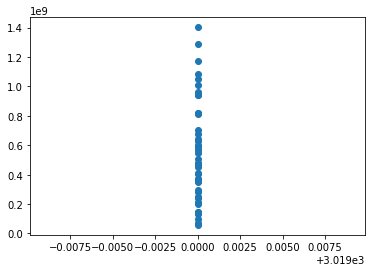